# Calculate a powder spectrum
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys, os
home_directory = os.path.join("..","..","..")
examples_directory = os.path.join(home_directory,'Examples')
sys.path.insert(0, home_directory)
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
In this example we read the VASP file in the current directory
The OUTCAR in this directory is for a VASP calculation on ZnO
The support material will be PTFE

In [2]:
ZnO = getMaterial(os.path.join(examples_directory,'Vasp','ZnO','OUTCAR'))
matrix = getMaterial('ptfe')

## Use calculate the absorption using effective medium theory


In [3]:
frequencies = np.arange(200,500,0.2)
absorption1,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1) # Default is Maxwell-Garnett
absorption2,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.2) # and sphere
absorption3,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1,method='bruggeman')
absorption4,permittivity = calculatePowderSpectrum(frequencies,ZnO,matrix,0.2,method='bruggeman')

## Plot the absorption coefficent

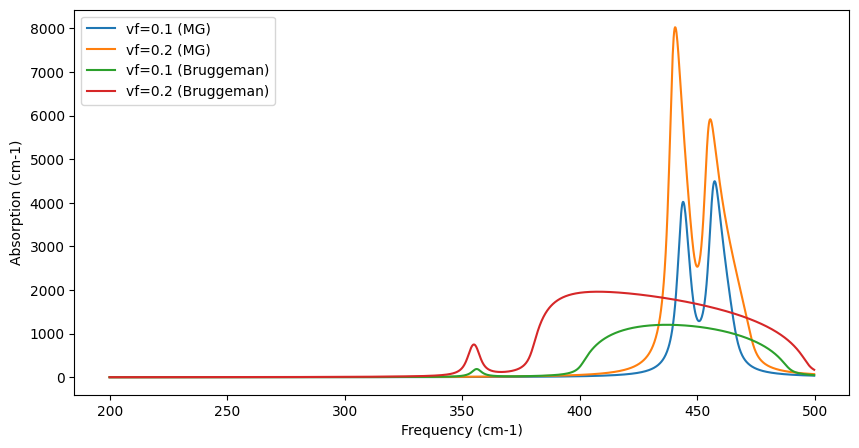

(<matplotlib.legend.Legend at 0x7bc80caa3790>, None)

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, absorption1,label='vf=0.1 (MG)') 
plt.plot(frequencies, absorption2,label='vf=0.2 (MG)')
plt.plot(frequencies, absorption3,label='vf=0.1 (Bruggeman)') 
plt.plot(frequencies, absorption4,label='vf=0.2 (Bruggeman)')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()